In [1]:
import pandas as pd

In [4]:
# Do this live... Start with google for 
df = pd.read_csv('data/dirty_data_from_w3.csv')
df.head()

index   Duration          Date  Pulse  Maxpulse  Calories
0  0         60  '2020/12/01'    110       130   ...       
1  1         60  '2020/12/02'    117       145   ...       
2  2         60  '2020/12/03'    103       135   ...       
3  3         45  '2020/12/04'    109       175   ...       
4  4         45  '2020/12/05'    117       148   ...

In [19]:
df = pd.read_csv('data/dirty_data_from_w3.csv', sep=' ')
df.head()

index  Duration          Date  Pulse  Maxpulse  Calories
0      0        60  '2020/12/01'    110       130     409.1
1      1        60  '2020/12/02'    117       145     479.0
2      2        60  '2020/12/03'    103       135     340.0
3      3        45  '2020/12/04'    109       175     282.4
4      4        45  '2020/12/05'    117       148     406.0

In [27]:
# ERROR ON LINE 26 OF FILE... 
df['datetime_object'] = pd.to_datetime(df['Date'])
df.head()


ValueError: time data "2020/12/26" doesn't match format "'%Y/%m/%d'", at position 26. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [28]:
# THIS IS BECAUSE LIKE 27 DOES NOT HAVE QUOTES "" AROUND THIS. 
# SO MANY WAYS TO FIX ITS,  easiest way is to use a 'quotechar' import option. 

df = pd.read_csv('data/dirty_data_from_w3.csv', sep=' ', quotechar="'")

df['datetime_object'] = pd.to_datetime(df['Date'])

df.head()


index  Duration        Date  Pulse  Maxpulse  Calories datetime_object
0      0        60  2020/12/01    110       130     409.1      2020-12-01
1      1        60  2020/12/02    117       145     479.0      2020-12-02
2      2        60  2020/12/03    103       135     340.0      2020-12-03
3      3        45  2020/12/04    109       175     282.4      2020-12-04
4      4        45  2020/12/05    117       148     406.0      2020-12-05

In [29]:
# CATCH ALL 

# Easier way to do this... 
df = pd.read_csv('data/dirty_data_from_w3.csv', sep=' ')
df['datetime_object'] = pd.to_datetime(df['Date'], format='mixed')
df.iloc[20:30]

index  Duration          Date  Pulse  Maxpulse  Calories datetime_object
20     20        45  '2020/12/20'     97       125     243.0      2020-12-20
21     21        60  '2020/12/21'    108       131     364.2      2020-12-21
22     22        45           NaN    100       119     282.0             NaT
23     23        60  '2020/12/23'    130       101     300.0      2020-12-23
24     24        45  '2020/12/24'    105       132     246.0      2020-12-24
25     25        60  '2020/12/25'    102       126     334.5      2020-12-25
26     26        60    2020/12/26    100       120     250.0      2020-12-26
27     27        60  '2020/12/27'     92       118     241.0      2020-12-27
28     28        60  '2020/12/28'    103       132       NaN      2020-12-28
29     29        60  '2020/12/29'    100       132     280.0      2020-12-29

In [31]:
from datetime import datetime
date_time_str = "28/01/23  08:20:00"
date_time_object = datetime.strptime(date_time_str, "%d/%m/%y %H:%M:%S")
print(date_time_object)
# check date_time_object_type
print(type(date_time_object))


2023-01-28 08:20:00
<class 'datetime.datetime'>


# Delimeters / Annoying Headers / Column Names

In [131]:
df = pd.read_csv('data/no_headers.csv')
df.head()

1\t 1\t one
0    10\t ten\t ten
1       20\t NULL\t
2  99\t 99.0\t nine

In [132]:
df = pd.read_csv('data/no_headers.csv', delimiter='\t')
df.head()

1      1    one
0  10    ten    ten
1  20   NULL    NaN
2  99   99.0   nine

In [134]:
df = pd.read_csv('data/no_headers.csv', delimiter='\t', header=None, names=['col1', 'col2', 'col3'])
df.head()



col1   col2   col3
0     1      1    one
1    10    ten    ten
2    20   NULL    NaN
3    99   99.0   nine

In [135]:
df = pd.read_csv('data/annoying_headers.csv')
print(df.head())

# HIGHLIGHT THE SPACE BEFORE THE COLUMNS
## ERROR 
# df["1"]
print(df.columns)

df = pd.read_csv('data/annoying_headers.csv', skipinitialspace=True)
print(df.columns)

## NO ERROR
df["1"]


df

   column_one   1   one   column-1   column 1
0          11  12    13         14         15
1          22  22    23         24         25
Index(['column_one', ' 1', ' one', ' column-1', ' column 1'], dtype='object')
Index(['column_one', '1', 'one', 'column-1', 'column 1'], dtype='object')


column_one   1  one  column-1  column 1
0          11  12   13        14        15
1          22  22   23        24        25

In [137]:
# Quickly do renaming collumns 
df = df.rename(columns={'column_one':'first_col'})
df

first_col   1  one  column-1  column 1
0         11  12   13        14        15
1         22  22   23        24        25

# NULLs // Columns With Mixed Data Types

In [2]:
df = pd.read_csv('data/mixed_types.csv')
print(df.dtypes)
df

just_ints        int64
mixed_types     object
just_strings    object
dtype: object


just_ints mixed_types just_strings
0          1           1          one
1         10         ten          ten
2         20        NULL          NaN
3         99        99.0          NaN
4        100         NaN          NaN
5        200         200      MISSING

In [3]:
# NULL, N/A, and MISSING are not NaNs its a string column. But N/A in line 5 is -- why? 
df.isnull()

just_ints  mixed_types  just_strings
0      False        False         False
1      False        False         False
2      False        False          True
3      False        False          True
4      False         True          True
5      False        False         False

In [4]:
df = pd.read_csv('data/mixed_types.csv', na_values=['MISSING'])
print(df.dtypes)
df

just_ints        int64
mixed_types     object
just_strings    object
dtype: object


just_ints mixed_types just_strings
0          1           1          one
1         10         ten          ten
2         20        NULL          NaN
3         99        99.0          NaN
4        100         NaN          NaN
5        200         200          NaN

In [5]:
## ERROR!  ten is not a number and 
df['should_be_ints'] = df['mixed_types'].astype(int)

ValueError: invalid literal for int() with base 10: ' ten'

In [10]:
df = pd.read_csv('data/mixed_types.csv')

def string_to_number(input_str):
    try:
        return(int(input_str))
    except:
        return None

df['should_be_numbers'] = df.mixed_types.apply(string_to_number)
print(df.dtypes)


## WHY IS 99.9 NOT COVERTED PROPERLY
df

just_ints              int64
mixed_types           object
just_strings          object
should_be_numbers    float64
dtype: object


just_ints mixed_types just_strings  should_be_numbers
0          1           1          one                1.0
1         10         ten          ten                NaN
2         20        NULL          NaN                NaN
3         99        99.0          NaN                NaN
4        100         NaN          NaN                NaN
5        200         200      MISSING              200.0

In [11]:
a = '99.0'
int(a)

ValueError: invalid literal for int() with base 10: '99.0'

In [12]:
df = pd.read_csv('data/mixed_types.csv')

def string_to_int(input_str):
    try:
        return( int(input_str) )
    except:
        pass
    try:
        return( float(input_str) )
    except:
        pass
    return None

df['should_be_numbers'] = df.mixed_types.apply(string_to_int)
print(df.dtypes)


## WHY IS 99.9 NOT COVERTED PROPERLY
df

just_ints              int64
mixed_types           object
just_strings          object
should_be_numbers    float64
dtype: object


just_ints mixed_types just_strings  should_be_numbers
0          1           1          one                1.0
1         10         ten          ten                NaN
2         20        NULL          NaN                NaN
3         99        99.0          NaN               99.0
4        100         NaN          NaN                NaN
5        200         200      MISSING              200.0

In [22]:
# AN EVEN EASIER WAY
## "If ‘coerce’, then invalid parsing will be set as NaN."
df['dang_this_is_easy'] = pd.to_numeric(df['mixed_types'], errors='coerce')
df

just_ints mixed_types just_strings  should_be_numbers  dang_this_is_easy
0          1           1          one                1.0                1.0
1         10         ten          ten                NaN                NaN
2         20        NULL          NaN                NaN                NaN
3         99        99.0          NaN               99.0               99.0
4        100         NaN          NaN                NaN                NaN
5        200         200      MISSING              200.0              200.0

In [57]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [152]:
df.to_clipboard()

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
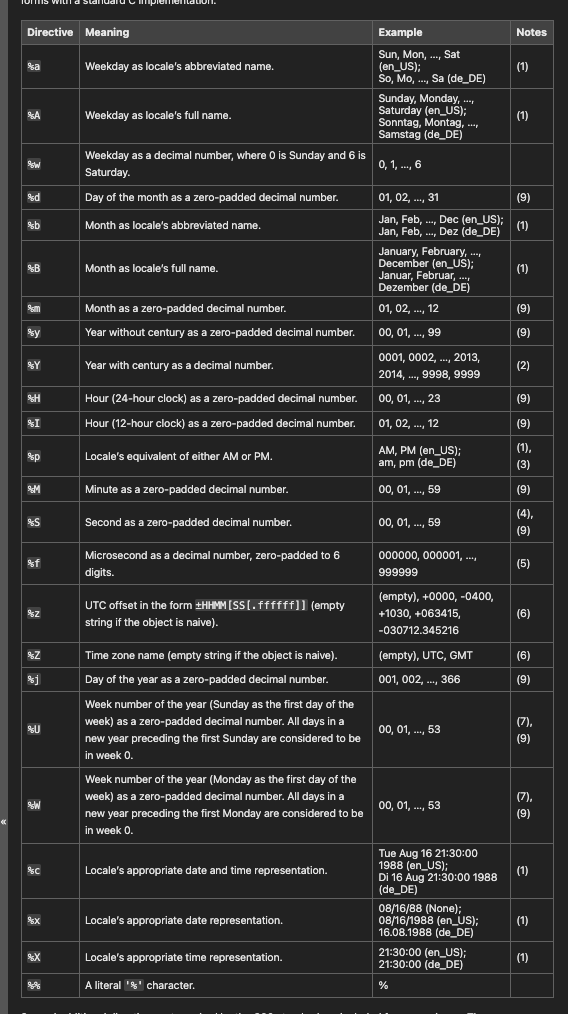

# From Zacks Experience at the Presidential Campaign 
* The best format to use for dates is 'YYYYMMDD' 
* for example, '20240826'
* This is because it's easily sortable in string format, its easy to format to a proper datetime object, and '/' and '-' or '.' seperators can just mess things up.   

In [9]:
dfc = pd.read_clipboard()
dfc.head()

Duration          Date  Pulse  Maxpulse  Calories
0        60  '2020/12/01'    110       130     409.1
1        60  '2020/12/02'    117       145     479.0
2        60  '2020/12/03'    103       135     340.0
3        45  '2020/12/04'    109       175     282.4
4        45  '2020/12/05'    117       148     406.0